# Mini Hadron Collider

### Twiss and Survey

In [2]:
pwd

'/home/pbelange/abp/simpleHC/MiniHC'

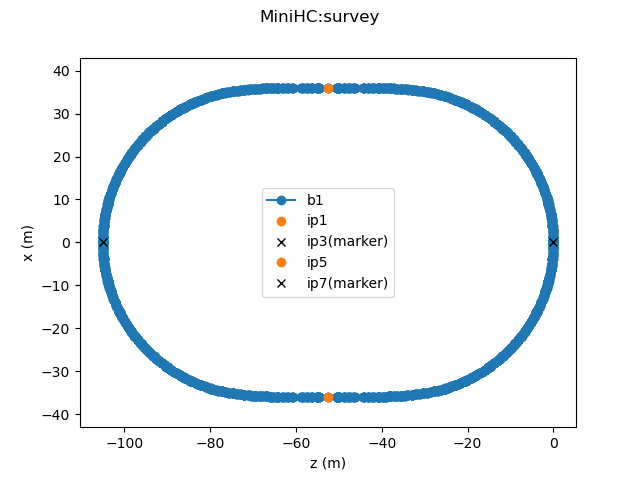

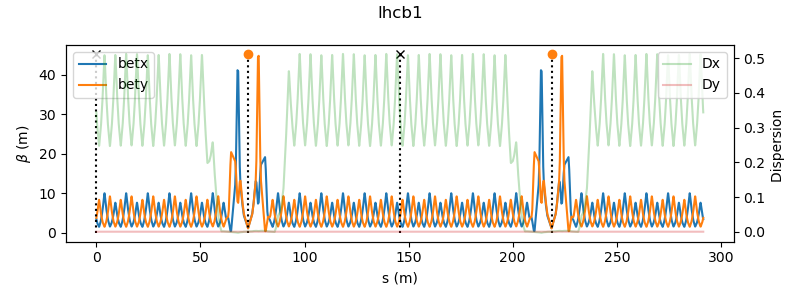

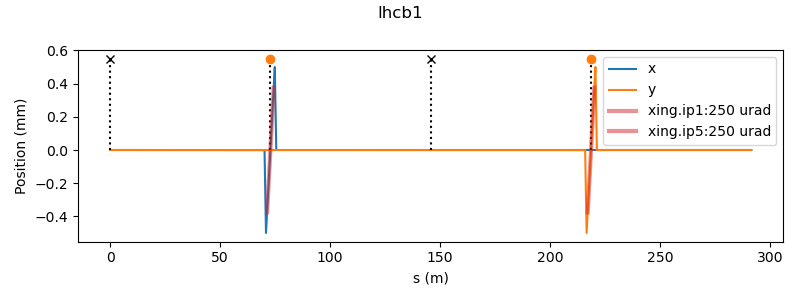

In [2]:
import subprocess
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from cpymad.madx import Madx


# Importing LHC sequences:
with open('madx_input.log', 'w') as f:
    mad = Madx(stdout=f)
    mad.option(echo = True, warn = True)
    mad.call(file='Backend/MAD/MiniHC.mad')
    #mad.call(file='../Backend/MAD/tmp_template.mad')


    mad.command.beam(particle='proton',sequence='lhcb1',charge=1,npart=1,energy=7000,bv=1)

    mad.input('use,sequence=lhcb1')
    if True:
        twiss  = {}
        survey = {}
        for seq in ['lhcb1']:

            mad.sequence[seq].use()
            #mad.twiss()
            mad.survey()
            #twiss[seq[-2:]]  = mad.table['twiss'].dframe()
            survey[seq[-2:]] = mad.table['survey'].dframe()
            
%matplotlib widget

plt.figure()
plt.suptitle('MiniHC:survey')
for beam in ['b1']:
    plt.plot(survey[beam]['x'],survey[beam]['z'],'-o',label=beam)
    for _IP in ['ip1','ip3','ip5','ip7']:
        if _IP in 'ip1 | ip5':
            plt.plot(survey[beam].loc[_IP,'x'],survey[beam].loc[_IP,'z'],'o',color='C1',label=_IP )
        else:
            plt.plot(survey[beam].loc[_IP,'x'],survey[beam].loc[_IP,'z'],'x',color='k',label=_IP + '(marker)')
plt.legend()
plt.axis('equal')
plt.xlabel('z (m)')
plt.ylabel(r'x (m)')




seq = 'lhcb1'
mad.input(f'use,sequence={seq};')
mad.twiss()
_twiss = mad.table['twiss'].dframe()

plt.figure(figsize=(8,3))
plt.suptitle(seq)
plt.plot(_twiss['s'],_twiss['betx'],label='betx')
plt.plot(_twiss['s'],_twiss['bety'],label='bety')
for _IP in ['ip1','ip3','ip5','ip7']:
    if _IP in 'ip1 | ip5':
        plt.stem(_twiss.loc[_IP,'s'],1.1*np.max(_twiss['betx']),markerfmt='C1o',linefmt='k:')
    else:
        plt.stem(_twiss.loc[_IP,'s'],1.1*np.max(_twiss['betx']),markerfmt='kx',linefmt='k:')


plt.legend(loc='upper left')
plt.xlabel('s (m)')
plt.ylabel(r'$\beta$ (m)')

ax2 = plt.gca().twinx()
plt.sca(ax2)
plt.plot(_twiss['s'],_twiss['dx'],alpha=0.3,color='C2',label='Dx')
plt.plot(_twiss['s'],_twiss['dy'],alpha=0.3,color='C3',label='Dy')
plt.legend(loc='upper right')
plt.ylabel(r'Dispersion ')
plt.tight_layout()




plt.figure(figsize=(8,3))
plt.suptitle(seq)
plt.plot(_twiss['s'],_twiss['x']/1e-3,label='x')
plt.plot(_twiss['s'],_twiss['y']/1e-3,label='y')
for _IP in ['ip1','ip3','ip5','ip7']:
    if _IP in 'ip1 | ip5':
        plt.stem(_twiss.loc[_IP,'s'],1.1*np.max(_twiss['x']/1e-3),markerfmt='C1o',linefmt='k:')
    else:
        plt.stem(_twiss.loc[_IP,'s'],1.1*np.max(_twiss['x']/1e-3),markerfmt='kx',linefmt='k:')
for _IP in ['ip1','ip5']:
    xing = {'ip1': 250e-6, 'ip5': 250e-6}[_IP]
    angle_x = _twiss.loc[_IP,'s'] + np.linspace(-1.5,1.5,100)
    angle_y = np.tan(xing)*angle_x - np.tan(xing)*_twiss.loc[_IP,'s']
    plt.plot(angle_x,angle_y/1e-3,'-',lw=3,alpha=0.5,color='C3',label=f'xing.{_IP}:{xing/1e-6:.0f} urad')
    
plt.legend()
plt.xlabel('s (m)')
plt.ylabel(r'Position (mm)')
plt.tight_layout()



# Archives

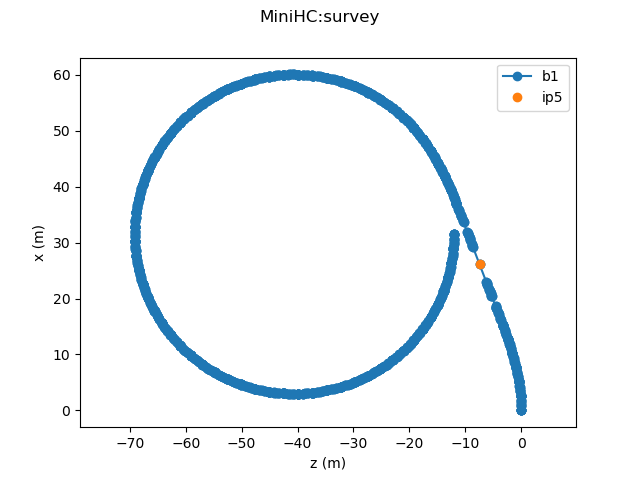

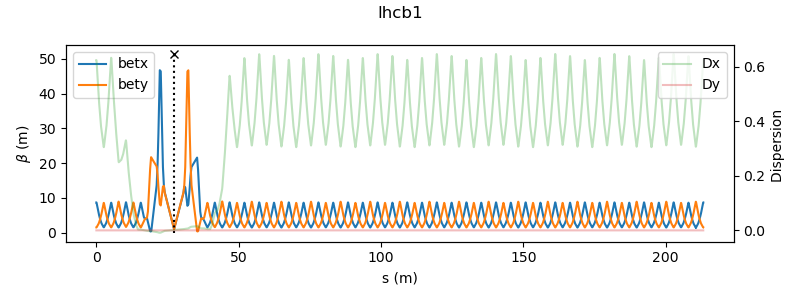

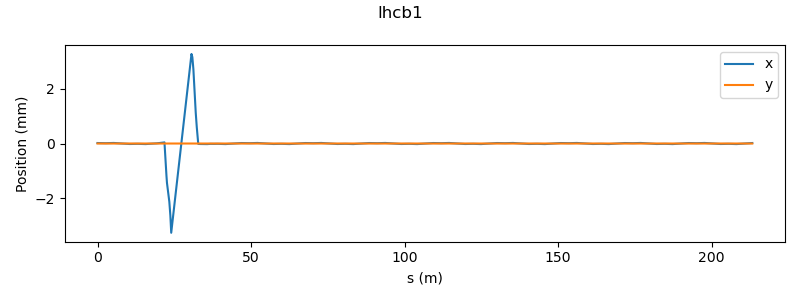

In [3]:
import subprocess
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from cpymad.madx import Madx

# Running pymask
cwd = os.getcwd()
os.chdir('../MiniBB_thick/')
# Run MINIBB



# Importing LHC sequences:
with open('../MiniHC/madx_archive.log', 'w') as f:
    mad = Madx(stdout=f)
    mad.option(echo = True, warn = True)
    #mad.call(file='Backend/MAD/MiniHC.mad')
    mad.call(file='minibb_thick_rb3.madx')


    mad.command.beam(particle='proton',sequence='lhcb1',charge=1,npart=1,energy=7000,bv=1)

    mad.input('use,sequence=lhcb1')
    if True:
        twiss  = {}
        survey = {}
        for seq in ['lhcb1']:

            mad.sequence[seq].use()
            #mad.twiss()
            mad.survey()
            #twiss[seq[-2:]]  = mad.table['twiss'].dframe()
            survey[seq[-2:]] = mad.table['survey'].dframe()

#os.chdir(cwd)

%matplotlib widget

plt.figure()
plt.suptitle('MiniHC:survey')
for beam in ['b1']:
    plt.plot(survey[beam]['x'],survey[beam]['z'],'-o',label=beam)
    for _IP in ['ip1','ip3','ip5','ip7']:
        if _IP in survey[beam].index:
            if _IP in 'ip1 | ip5':
                plt.plot(survey[beam].loc[_IP,'x'],survey[beam].loc[_IP,'z'],'o',color='C1',label=_IP )
            else:
                try:
                    plt.plot(survey[beam].loc[_IP,'x'],survey[beam].loc[_IP,'z'],'x',color='k',label=_IP + '(marker)')
                except:
                    pass
plt.legend()
plt.axis('equal')
plt.xlabel('z (m)')
plt.ylabel(r'x (m)')




seq = 'lhcb1'
mad.input(f'use,sequence={seq};')
mad.twiss()
_twiss = mad.table['twiss'].dframe()

plt.figure(figsize=(8,3))
plt.suptitle(seq)
plt.plot(_twiss['s'],_twiss['betx'],label='betx')
plt.plot(_twiss['s'],_twiss['bety'],label='bety')
for _IP in ['ip1','ip3','ip5','ip7']:
    try:
        plt.stem(_twiss.loc[_IP,'s'],1.1*np.max(_twiss['betx']),markerfmt='kx',linefmt='k:')
    except:
        pass

plt.legend(loc='upper left')
plt.xlabel('s (m)')
plt.ylabel(r'$\beta$ (m)')

ax2 = plt.gca().twinx()
plt.sca(ax2)
plt.plot(_twiss['s'],_twiss['dx'],alpha=0.3,color='C2',label='Dx')
plt.plot(_twiss['s'],_twiss['dy'],alpha=0.3,color='C3',label='Dy')
plt.legend(loc='upper right')
plt.ylabel(r'Dispersion ')
plt.tight_layout()


plt.figure(figsize=(8,3))
plt.suptitle(seq)
plt.plot(_twiss['s'],_twiss['x']/1e-3,label='x')
plt.plot(_twiss['s'],_twiss['y']/1e-3,label='y')


plt.legend()
plt.xlabel('s (m)')
plt.ylabel(r'Position (mm)')
plt.tight_layout()



os.chdir(cwd)

In [4]:
loc_ip5 = list(_twiss.index).index('ip5')
_twiss.iloc[loc_ip5-20:loc_ip5+20]

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1,kick
q1lb1[2],q1lb1:2,marker,21.350000,16.702509,-9.454650,1.221945,17.786709,3.712031,0.902954,0.000033,...,1.552520e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_81[0],drift_81:0,drift,21.516667,20.004387,-10.356614,1.223396,16.572446,3.573545,0.904499,0.000036,...,1.552618e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1lb1..2[2],q1lb1..2:2,multipole,21.516667,20.004387,-13.762210,1.223396,16.572446,6.394880,0.904499,0.000036,...,1.552618e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_82[0],drift_82:0,drift,21.800000,28.567043,-16.458930,1.225282,13.151620,5.678624,0.907554,0.000043,...,1.552916e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcb1l1,mcb1l1:1,hkicker,21.800000,28.567043,-16.458930,1.225282,13.151620,5.678624,0.907554,0.000043,...,1.552916e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_83[0],drift_83:0,drift,22.283333,46.700814,-21.059217,1.227388,8.252843,4.456777,0.914940,-0.000921,...,1.510436e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2lb1..1[2],q2lb1..1:2,multipole,22.283333,46.700814,0.502883,1.227388,8.252843,0.646380,0.914940,-0.000921,...,1.510436e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_84[0],drift_84:0,drift,22.450000,46.533932,0.498411,1.227958,8.042155,0.617748,0.918197,-0.001183,...,1.510640e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2lb1[2],q2lb1:2,marker,22.450000,46.533932,0.498411,1.227958,8.042155,0.617748,0.918197,-0.001183,...,1.510640e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_85[0],drift_85:0,drift,22.616667,46.368540,0.493940,1.228529,7.841011,0.589115,0.921537,-0.001444,...,1.510844e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
_twiss.groupby('keyword').count()

,name,s,betx,alfx,mux,bety,alfy,muy,x,px,...,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1,kick
keyword,,,,,,,,,,,,,,,,,,,,,
dipedge,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
drift,853,853,853,853,853,853,853,853,853,853,...,853,853,853,853,853,853,853,853,853,853
hkicker,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
marker,238,238,238,238,238,238,238,238,238,238,...,238,238,238,238,238,238,238,238,238,238
multipole,466,466,466,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,466
rfcavity,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Exporting sequence

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1.seq",
        BEAM     = true;''')

True

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1_bare.seq",
        BARE     = true;''')

True

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1_strengths.seq",
        CSAVE    = true;''')

True